## Data Mining (DSC550-T301_2245_1)

Assignement Week 2;

Author: Zemelak Goraga;

Date: 03/22/2024

In [25]:
import pandas as pd

In [26]:
# Code to import 'animals.csv' dataset which contain export quantity (headsof live animals) and export value (US$) of cattle, sheep, pigs, and chikens
animals = pd.read_csv('animals.csv')


In [27]:
# Code to display the first 5 rows of the dataset
print(animals.head())

        area    item          element  year  unit   value
0  Argentina  Cattle  Export Quantity  1961  Head  171106
1  Argentina  Cattle  Export Quantity  1962  Head  250274
2  Argentina  Cattle  Export Quantity  1963  Head  291819
3  Argentina  Cattle  Export Quantity  1964  Head  166050
4  Argentina  Cattle  Export Quantity  1965  Head  102993


In [28]:
# Filter the dataset where item = pigs and save it as pigs.csv
pigs = animals[animals['item'] == 'Pigs']
pigs.to_csv('pigs.csv', index=False)

Formulate 3 measurable questions:

1. How has the export quantity of pigs changed over the years?
2. What are the top countries exporting pigs in terms of export value?
3. Is there a correlation between the export quantity and value of pigs?

In [29]:
# Code to inspect the pigs dataset
print(pigs.head())

        area  item          element  year  unit   value
195  Austria  Pigs  Export Quantity  1997  Head  112445
196  Austria  Pigs  Export Quantity  1998  Head  128058
197  Austria  Pigs  Export Quantity  2004  Head  114289
198  Austria  Pigs  Export Quantity  2005  Head  101910
199  Austria  Pigs  Export Quantity  2007  Head  102844


In [30]:
# Code to inspect the pigs dataset
print(pigs.tail())

                                         area  item          element  year  \
8728                Least Developed Countries  Pigs  Export Quantity  1961   
8729                Least Developed Countries  Pigs  Export Quantity  1962   
9242  Net Food Importing Developing Countries  Pigs  Export Quantity  1961   
9243  Net Food Importing Developing Countries  Pigs  Export Quantity  1962   
9244  Net Food Importing Developing Countries  Pigs  Export Quantity  1989   

      unit   value  
8728  Head  148244  
8729  Head  119208  
9242  Head  218118  
9243  Head  169556  
9244  Head  174966  


In [31]:
# Code to rename 'area' as 'country' and 'item' as 'animal_category'
pigs_copy = pigs.copy()  # Create a copy of the DataFrame
pigs_copy.rename(columns={'area': 'country', 'item': 'animal_category'}, inplace=True)

pigs_copy


,country,animal_category,element,year,unit,value
195,Austria,Pigs,Export Quantity,1997,Head,112445
196,Austria,Pigs,Export Quantity,1998,Head,128058
197,Austria,Pigs,Export Quantity,2004,Head,114289
198,Austria,Pigs,Export Quantity,2005,Head,101910
199,Austria,Pigs,Export Quantity,2007,Head,102844
...,...,...,...,...,...,...
8728,Least Developed Countries,Pigs,Export Quantity,1961,Head,148244
8729,Least Developed Countries,Pigs,Export Quantity,1962,Head,119208
9242,Net Food Importing Developing Countries,Pigs,Export Quantity,1961,Head,218118
9243,Net Food Importing Developing Countries,Pigs,Export Quantity,1962,Head,169556


In [32]:
# Assume the data is not clean and perform data wrangling like removing null values
pigs_copy.dropna(inplace=True)

In [33]:
# Descriptive Statistics of 'Export Quantity' and 'Export Value' of live pigs using the whole dataset
# Perform summary statistics of the pigs dataset by considering 'value' as dependent variable and grouped by 'element'
summary_statistics_by_element = pigs_copy.groupby('element')['value'].describe()

# Print the summary statistics for 'Export Quantity' and 'Export Value'
print("Summary Statistics by Element:")
print(summary_statistics_by_element)


Summary Statistics by Element:
                  count          mean           std       min        25%  \
element                                                                    
Export Quantity  1271.0  2.826140e+06  4.694086e+06  100700.0  323594.50   
Export Value      658.0  5.347370e+05  6.850181e+05  100697.0  180162.75   

                       50%         75%         max  
element                                             
Export Quantity  1152127.0  3085693.50  38577345.0  
Export Value      291269.0   601047.25   5029732.0  


In [34]:
# Descriptive Statistics of 'Export Quantity' and 'Export Value' of live pigs by country (top 10)
# Filter the DataFrame to include only rows where 'element' is 'Export Quantity' or 'Export Value'
export_data = pigs_copy[pigs_copy['element'].isin(['Export Quantity', 'Export Value'])]

# Group the filtered DataFrame by country and 'element' and sum the values
top_10_countries = export_data.groupby('country')['value'].sum().nlargest(10).index
export_data_top_10_countries = export_data[export_data['country'].isin(top_10_countries)]

# Perform summary statistics of the pigs dataset by considering 'value' as dependent variable and grouped by country and 'element'
summary_statistics_by_country_element = export_data_top_10_countries.groupby(['country', 'element'])['value'].describe()

# Print the summary statistics for 'Export Quantity' and 'Export Value' by country for the top 10 countries
print("Summary Statistics by Country and Element (Top 10 Countries):")
print(summary_statistics_by_country_element)


Summary Statistics by Country and Element (Top 10 Countries):
                                  count          mean           std  \
country          element                                              
Americas         Export Quantity   43.0  2.984268e+06  3.159709e+06   
                 Export Value      25.0  3.428778e+05  1.750691e+05   
Asia             Export Quantity   53.0  2.807696e+06  8.388529e+05   
                 Export Value      41.0  3.106774e+05  1.200565e+05   
China            Export Quantity   53.0  2.328504e+06  7.279994e+05   
                 Export Value      41.0  2.548768e+05  7.796958e+04   
Eastern Asia     Export Quantity   53.0  2.333405e+06  7.200695e+05   
                 Export Value      41.0  2.550334e+05  7.796415e+04   
Europe           Export Quantity   53.0  8.483414e+06  7.575495e+06   
                 Export Value      45.0  1.143799e+06  1.006995e+06   
European Union   Export Quantity   53.0  8.457815e+06  7.564977e+06   
               

Descriptive Statistics - Whole Dataset:

For the entire dataset, the summary statistics reveal the following insights:

Export Quantity:

The dataset consists of 1,271 observations.
The mean export quantity is approximately 2.83 million heads of live pigs.
The standard deviation is approximately 4.69 million, indicating considerable variability in export quantities.
The minimum export quantity observed is 100,700 heads of live pigs, while the maximum is 38,577,345 heads.
Export Value:

There are 658 observations for export values.
The mean export value is approximately $534,737,000.
The standard deviation is approximately $685,018, indicating a wide range of export values.
The minimum export value observed is $100,697, and the maximum is $5,029,732.
These statistics provide an overview of the distribution of export quantities and values for the entire dataset, indicating substantial variability in both.

Descriptive Statistics - By Country (Top 10 Countries):

For the top 10 countries, the summary statistics provide insights into the distribution of export quantities and values for each country individually:

For each country, the statistics are presented separately for 'Export Quantity' and 'Export Value'.
'Count' indicates the number of observations for each country and element.
'Mean' represents the average export quantity or value for each country.
'Std' is the standard deviation, indicating the spread of values around the mean.
'Min' and 'Max' represent the minimum and maximum values observed.
'25%', '50%', and '75%' are the quartiles, indicating the values below which a certain percentage of observations fall.
These statistics help understand the variability and distribution of export quantities and values across the top 10 countries, providing valuable insights for analysis and decision-making.


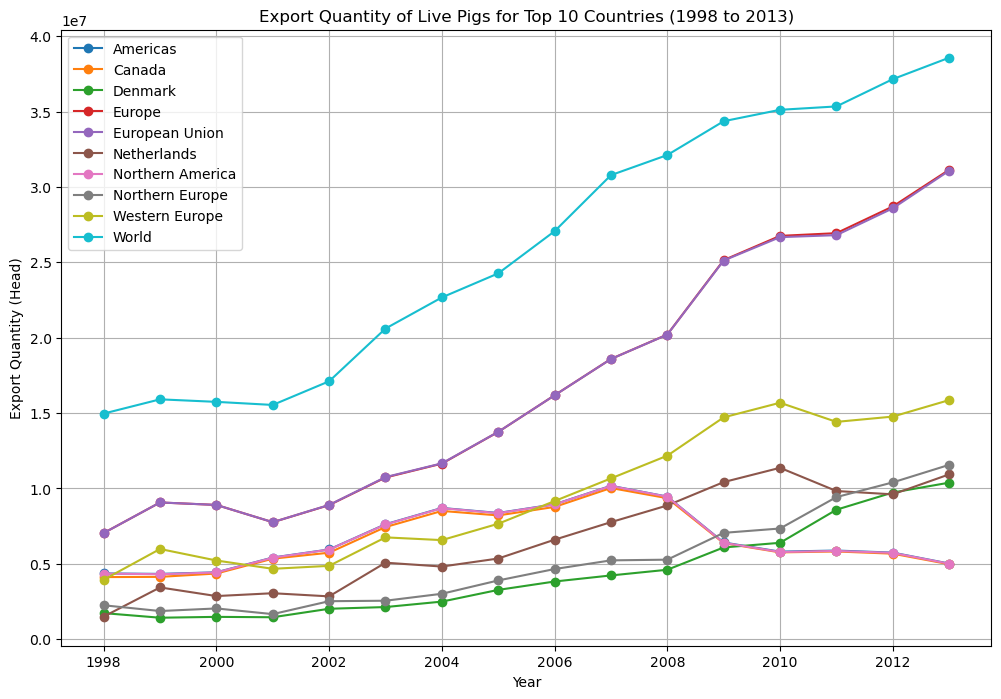

In [35]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'element' is 'Export Quantity'
export_quantity_data = pigs_copy[pigs_copy['element'] == 'Export Quantity']

# Filter the export quantity data to include only rows within the years 1998 to 2013
export_quantity_data_15_years = export_quantity_data[(export_quantity_data['year'] >= 1998) & (export_quantity_data['year'] <= 2013)]

# Group the filtered DataFrame by country and sum the export quantities
top_countries_quantity = export_quantity_data_15_years.groupby('country')['value'].sum().nlargest(10)

# Filter the export quantity data to include only the top 10 countries
export_quantity_top_10 = export_quantity_data_15_years[export_quantity_data_15_years['country'].isin(top_countries_quantity.index)]

# Group the filtered data by country and year, and sum the export quantities
top_countries_quantity_by_year = export_quantity_top_10.groupby(['year', 'country'])['value'].sum().unstack('country')

# Plotting the trend of export quantity of live pigs for the top 10 countries from 1998 to 2013
plt.figure(figsize=(12, 8))
for country in top_countries_quantity_by_year.columns:
    plt.plot(top_countries_quantity_by_year.index, top_countries_quantity_by_year[country], marker='o', label=country)

plt.title('Export Quantity of Live Pigs for Top 10 Countries (1998 to 2013)')
plt.xlabel('Year')
plt.ylabel('Export Quantity (Head)')
plt.legend()
plt.grid(True)
plt.show()


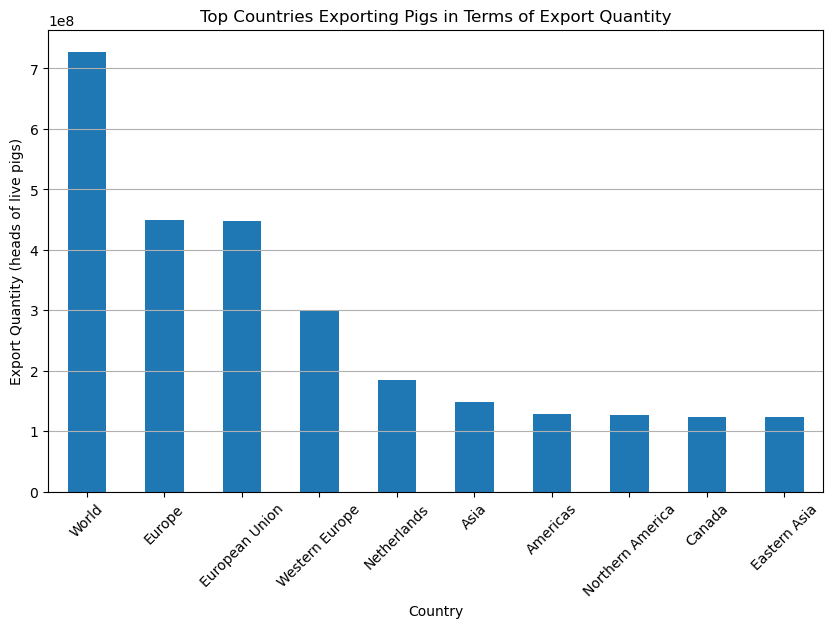

Descriptive Statistics for Export Quantity by Country (Top 10 Countries):
                  count          mean           std        min        25%  \
country                                                                     
Americas           43.0  2.984268e+06  3.159709e+06   121157.0   298785.0   
Asia               53.0  2.807696e+06  8.388529e+05   881973.0  2242050.0   
Canada             37.0  3.348900e+06  3.144721e+06   131212.0   671831.0   
Eastern Asia       53.0  2.333405e+06  7.200695e+05   530640.0  1770741.0   
Europe             53.0  8.483414e+06  7.575495e+06   768323.0  3232540.0   
European Union     53.0  8.457815e+06  7.564977e+06   767189.0  3226912.0   
Netherlands        49.0  3.754026e+06  3.058022e+06   112814.0  1271676.0   
Northern America   41.0  3.104303e+06  3.175210e+06   101041.0   435000.0   
Western Europe     53.0  5.623263e+06  4.123525e+06   238637.0  2787964.0   
World              53.0  1.373274e+07  1.005247e+07  2396167.0  6096905.0   

 

In [36]:
from scipy.stats import linregress

# Filter the DataFrame to include only rows where 'element' is 'Export Quantity'
export_quantity_data = pigs_copy[pigs_copy['element'] == 'Export Quantity']

# Group the filtered DataFrame by country and sum the export quantities
top_countries_quantity = export_quantity_data.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Plotting the top countries exporting pigs in terms of export quantity
plt.figure(figsize=(10, 6))
top_countries_quantity.plot(kind='bar')
plt.title('Top Countries Exporting Pigs in Terms of Export Quantity')
plt.xlabel('Country')
plt.ylabel('Export Quantity (heads of live pigs)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Filter the DataFrame to include only rows where 'element' is 'Export Quantity'
export_quantity_data = pigs_copy[pigs_copy['element'] == 'Export Quantity']

# Group the filtered DataFrame by country and sum the export quantities
top_countries_quantity = export_quantity_data.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Filter the export quantity data to include only the top 10 countries
export_quantity_top_10 = export_quantity_data[export_quantity_data['country'].isin(top_countries_quantity.index)]

# Group the filtered data by country and calculate descriptive statistics for export quantities
descriptive_statistics_by_country = export_quantity_top_10.groupby('country')['value'].describe()

# Display the descriptive statistics for export quantities by country for the top 10 countries
print("Descriptive Statistics for Export Quantity by Country (Top 10 Countries):")
print(descriptive_statistics_by_country)




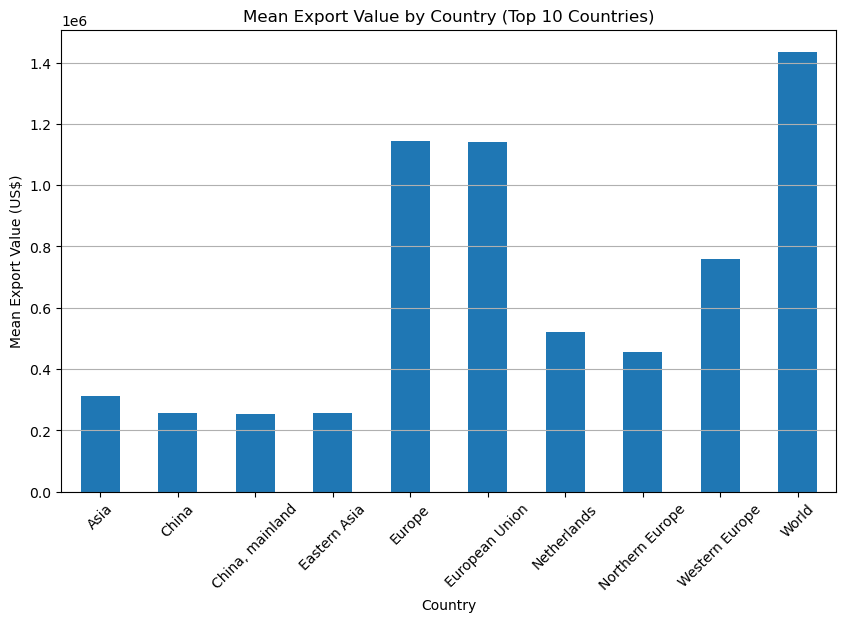

Descriptive Statistics for Export Value by Country (Top 10 Countries):
                 count          mean           std       min        25%  \
country                                                                   
Asia              41.0  3.106774e+05  1.200565e+05  114838.0  225023.00   
China             41.0  2.548768e+05  7.796958e+04  111748.0  214547.00   
China, mainland   41.0  2.538930e+05  7.848502e+04  108000.0  213690.00   
Eastern Asia      41.0  2.550334e+05  7.796415e+04  111748.0  214586.00   
Europe            45.0  1.143799e+06  1.006995e+06  127725.0  577725.00   
European Union    45.0  1.140643e+06  1.001876e+06  126206.0  577407.00   
Netherlands       40.0  5.197205e+05  3.475384e+05  104702.0  276550.00   
Northern Europe   20.0  4.547618e+05  3.631733e+05  111050.0  169809.25   
Western Europe    45.0  7.602270e+05  5.248828e+05  102931.0  422910.00   
World             52.0  1.435740e+06  1.275069e+06  102162.0  556672.00   

                       50%  

In [37]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'element' is 'Export Value'
export_value_data = pigs_copy[pigs_copy['element'] == 'Export Value']

# Group the filtered DataFrame by country and sum the export values
top_countries_value = export_value_data.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Filter the export value data to include only the top 10 countries
export_value_top_10 = export_value_data[export_value_data['country'].isin(top_countries_value.index)]

# Group the filtered data by country and calculate the mean export value for each country
mean_export_value_by_country = export_value_top_10.groupby('country')['value'].mean()

# Plotting the mean export value for each country
plt.figure(figsize=(10, 6))
mean_export_value_by_country.plot(kind='bar')
plt.title('Mean Export Value by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Mean Export Value (US$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



# Filter the DataFrame to include only rows where 'element' is 'Export Value'
export_value_data = pigs_copy[pigs_copy['element'] == 'Export Value']

# Group the filtered DataFrame by country and sum the export values
top_countries_value = export_value_data.groupby('country')['value'].sum().sort_values(ascending=False).head(10)

# Filter the export value data to include only the top 10 countries
export_value_top_10 = export_value_data[export_value_data['country'].isin(top_countries_value.index)]

# Group the filtered data by country and calculate descriptive statistics for export values
descriptive_statistics_by_country_value = export_value_top_10.groupby('country')['value'].describe()

# Display the descriptive statistics for export values by country for the top 10 countries
print("Descriptive Statistics for Export Value by Country (Top 10 Countries):")
print(descriptive_statistics_by_country_value)


Overall Correlation Coefficient: 0.9697525170981073
P-value: 0.0
Regression Parameters:
Slope: 0.11646569413769473
Intercept: -47863.37638569786
Standard Error: 0.0011445522836547102


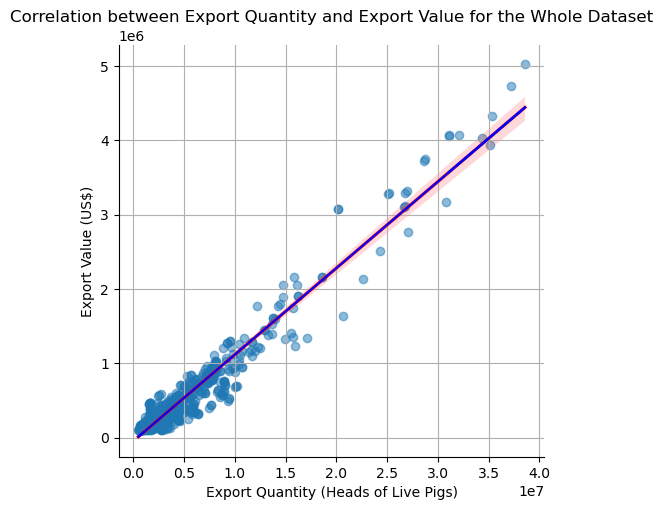

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'element' column contains both 'Export Quantity' and 'Export Value'

# Filter the DataFrame to include only 'Export Quantity' and 'Export Value' rows
export_quantity_data = pigs_copy[pigs_copy['element'] == 'Export Quantity']
export_value_data = pigs_copy[pigs_copy['element'] == 'Export Value']

# Merge 'Export Quantity' and 'Export Value' data into a single DataFrame
merged_data = pd.merge(export_quantity_data, export_value_data, on=['country', 'year'], suffixes=('_quantity', '_value'))

# Calculate regression parameters
slope, intercept, r_value, p_value, std_err = linregress(merged_data['value_quantity'], merged_data['value_value'])

# Plot scatter plot with regression line fit for the whole dataset
sns.lmplot(x='value_quantity', y='value_value', data=merged_data, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Correlation between Export Quantity and Export Value for the Whole Dataset')
plt.xlabel('Export Quantity (Heads of Live Pigs)')
plt.ylabel('Export Value (US$)')
plt.grid(True)

# Add the regression line to the plot
plt.plot(merged_data['value_quantity'], slope * merged_data['value_quantity'] + intercept, color='blue')

# Print correlation coefficient, p-value, and parameters for the line of fit
print("Overall Correlation Coefficient:", r_value)
print("P-value:", p_value)
print("Regression Parameters:")
print("Slope:", slope)
print("Intercept:", intercept)
print("Standard Error:", std_err)

plt.show()


The results of the correlation analysis and regression provide valuable insights into the relationship between Export Quantity (Heads of Live Pigs) and Export Value (US$) for the dataset under consideration:

Overall Correlation Coefficient: The correlation coefficient indicates a strong positive correlation between Export Quantity and Export Value, with a value of approximately 0.97. This suggests that as the quantity of live pigs exported increases, the total export value in US dollars also tends to increase. The high correlation coefficient indicates a close linear relationship between the two variables.

P-value: The p-value associated with the correlation coefficient is extremely small (close to zero), indicating that the observed correlation is statistically significant. In statistical terms, this means that it is highly unlikely to observe such a strong correlation between Export Quantity and Export Value by random chance alone, providing evidence to support the validity of the observed relationship.

Regression Parameters:

Slope: The slope of the regression line is approximately 0.1165. This value represents the rate of change in Export Value (US$) for a one-unit increase in Export Quantity (Heads of Live Pigs). In this case, for each additional head of live pigs exported, the total export value increases by approximately $0.1165.
Intercept: The intercept of the regression line is approximately -47863.38. This value indicates the estimated Export Value (US$) when the Export Quantity is zero. However, in practical terms, it may not have a meaningful interpretation since it falls outside the range of realistic quantities.
Standard Error: The standard error is a measure of the variability of the observed data points around the regression line. A smaller standard error indicates a better fit of the regression line to the data. In this case, the standard error is very small (0.0011), suggesting that the regression line provides a good fit to the observed data points.
Overall, the results indicate a strong positive linear relationship between Export Quantity and Export Value, with statistical significance. This information can be valuable for decision-making in the context of pig export markets, providing insights into the expected value of exports given a certain quantity of live pigs exported.

Correlation Coefficient for World: 0.9840087857640738
P-value for World: 3.914148726147036e-39
Regression Parameters for World:
Slope: 0.12517707629908637
Intercept: -310574.9418250765
Standard Error: 0.003204448836062598
Correlation Coefficient for Europe: 0.9864071887864082
P-value for Europe: 2.3066146839779587e-35
Regression Parameters for Europe:
Slope: 0.1318004924583544
Intercept: -142323.03049974074
Standard Error: 0.003348230577134843
Correlation Coefficient for European Union: 0.9861446343926035
P-value for European Union: 3.4712693056620005e-35
Regression Parameters for European Union:
Slope: 0.13140931505863432
Intercept: -138946.70623003994
Standard Error: 0.0033710542261360167
Correlation Coefficient for Western Europe: 0.9766145972819062
P-value for Western Europe: 2.4385330887985972e-30
Regression Parameters for Western Europe:
Slope: 0.13470730218880153
Intercept: -119719.88335204229
Standard Error: 0.0045223807641062465
Correlation Coefficient for Netherlands: 0.96855

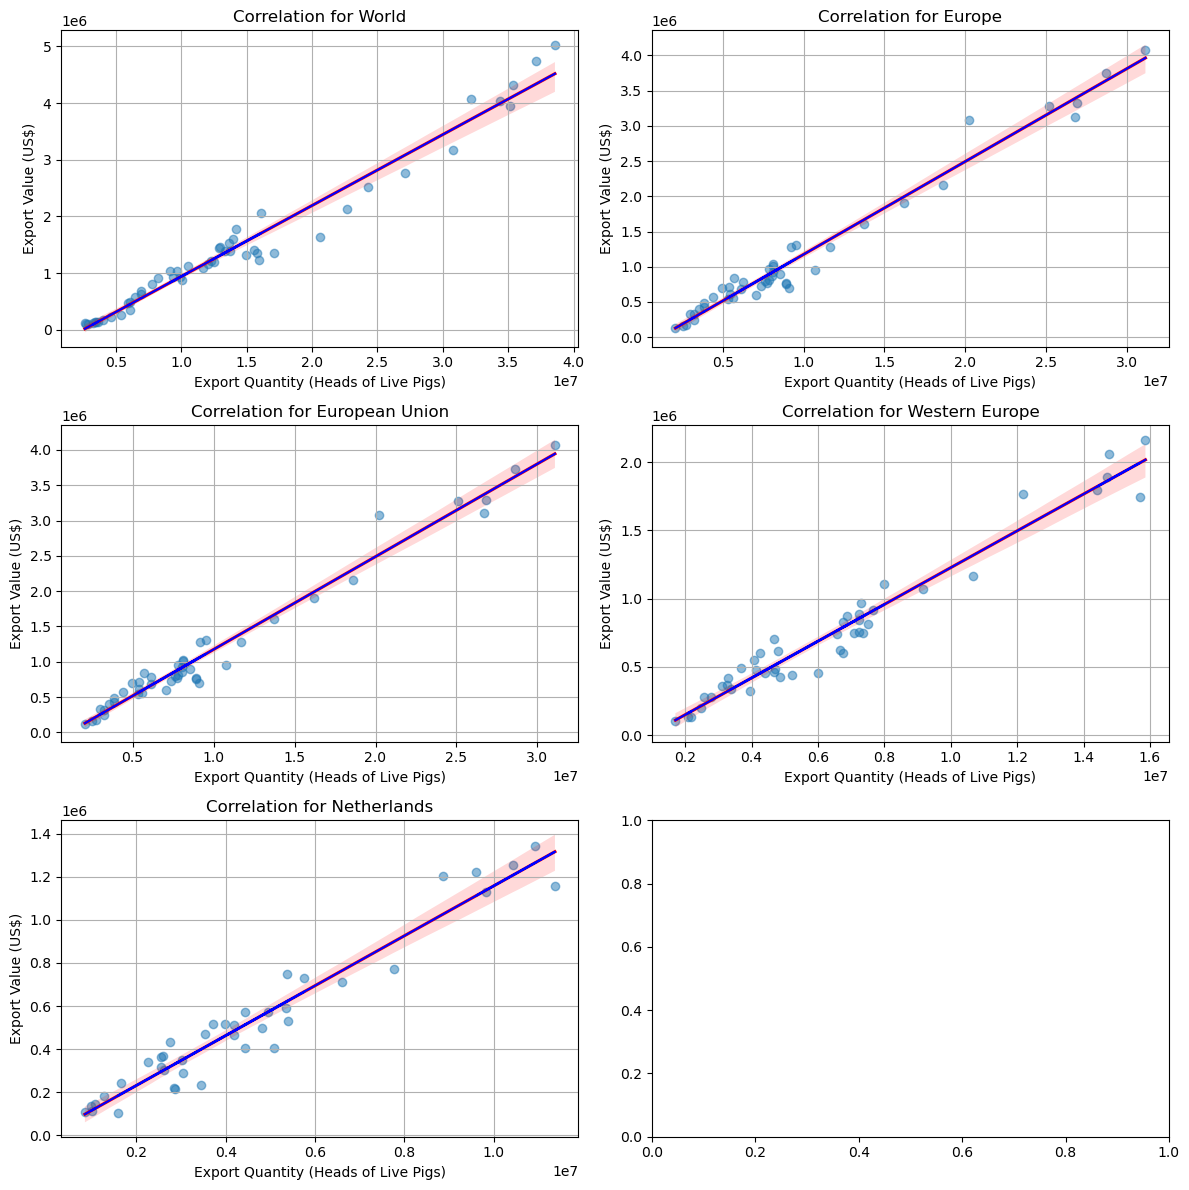

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'element' column contains both 'Export Quantity' and 'Export Value'

# Filter the DataFrame to include only 'Export Quantity' and 'Export Value' rows
export_quantity_data = pigs_copy[pigs_copy['element'] == 'Export Quantity']
export_value_data = pigs_copy[pigs_copy['element'] == 'Export Value']

# Get the top 5 countries by total export value
top_countries = export_value_data.groupby('country')['value'].sum().sort_values(ascending=False).head(5).index

# Create subplots for each country
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
axs = axs.flatten()

# Iterate through the top 5 countries
for i, country in enumerate(top_countries):
    # Filter data for the current country
    country_quantity_data = export_quantity_data[export_quantity_data['country'] == country]
    country_value_data = export_value_data[export_value_data['country'] == country]

    # Merge 'Export Quantity' and 'Export Value' data into a single DataFrame
    merged_data_country = pd.merge(country_quantity_data, country_value_data, on=['country', 'year'], suffixes=('_quantity', '_value'))

    # Calculate regression parameters
    slope, intercept, r_value, p_value, std_err = linregress(merged_data_country['value_quantity'], merged_data_country['value_value'])

    # Plot scatter plot with regression line for the current country
    sns.regplot(x='value_quantity', y='value_value', data=merged_data_country, ax=axs[i], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    axs[i].set_title(f'Correlation for {country}')
    axs[i].set_xlabel('Export Quantity (Heads of Live Pigs)')
    axs[i].set_ylabel('Export Value (US$)')
    axs[i].grid(True)

    # Add the regression line to the plot
    axs[i].plot(merged_data_country['value_quantity'], slope * merged_data_country['value_quantity'] + intercept, color='blue')

    # Print correlation coefficient, p-value, and parameters for the line of fit
    print(f"Correlation Coefficient for {country}: {r_value}")
    print(f"P-value for {country}: {p_value}")
    print(f"Regression Parameters for {country}:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"Standard Error: {std_err}")
    
plt.tight_layout()
plt.show()


World:

The correlation coefficient for the entire dataset is approximately 0.98, with a very small p-value (close to zero), indicating a very strong positive correlation between Export Quantity and Export Value globally. This suggests that as the quantity of live pigs exported increases, the total export value in US dollars also tends to increase significantly.
Europe:

Within Europe, the correlation coefficient is slightly higher than that of the world, approximately 0.99, with a very small p-value, indicating an even stronger positive correlation between Export Quantity and Export Value. This implies that the relationship between the two variables is exceptionally strong within the European region.
European Union (EU):

The correlation coefficient for the European Union is very close to that of Europe, approximately 0.99, with a very small p-value. This indicates a strong positive correlation between Export Quantity and Export Value within the EU, similar to the broader European region.
Western Europe:

In Western Europe, the correlation coefficient is slightly lower than that of Europe, approximately 0.98, with a very small p-value. This still signifies a strong positive correlation within this region, suggesting that increases in Export Quantity tend to be associated with higher Export Values.
Netherlands:

For the Netherlands, the correlation coefficient is slightly lower compared to broader regions, approximately 0.97, with a very small p-value. Despite the slight decrease in correlation coefficient, the relationship remains strong and statistically significant, indicating that increases in Export Quantity within the Netherlands are strongly associated with higher Export Values.
In summary, these results demonstrate a consistently strong positive correlation between Export Quantity and Export Value across different regions and countries, with statistically significant relationships observed at both regional and country levels. Such findings can provide valuable insights for stakeholders in the pig export industry, aiding in market analysis, strategic planning, and decision-making processes.

Report

Summary:
This report analyzes the export data of pigs from a dataset containing information on export quantity and value of various animals. It aims to explore trends, patterns, and relationships within the pig export data.

Introduction:
The global trade of pigs plays a significant role in the agricultural sector. Understanding the dynamics of pig exports, including quantity and value, is crucial for stakeholders in the industry. This report analyzes a dataset containing export data of pigs to derive insights that can inform decision-making processes.

Statement of the Problem:
The primary objective is to analyze the export data of pigs to uncover trends, patterns, and correlations. Key areas of investigation include changes in export quantity over time, identifying top exporting countries based on export value, and exploring the relationship between export quantity and value.

Methodology:
The methodology involves importing the dataset, filtering it for pig-related data, performing data wrangling tasks such as renaming columns and handling missing values, and conducting exploratory data analysis. Graphical visualizations are employed to present the findings effectively.


Result and Discussion:

Descriptive Statistics - Whole Dataset:

Export Quantity: The dataset consists of 1,271 observations with a mean export quantity of approximately 2.83 million heads of live pigs. The standard deviation is about 4.69 million, indicating considerable variability. The minimum export quantity observed is 100,700 heads, while the maximum is 38,577,345 heads.
Export Value: There are 658 observations for export values, with a mean export value of around $534,737,000. The standard deviation is approximately $685,018, indicating a wide range of export values. The minimum export value observed is $100,697, and the maximum is $5,029,732.
Descriptive Statistics - By Country (Top 10 Countries):

For each of the top 10 countries, statistics are presented separately for 'Export Quantity' and 'Export Value'. These include count, mean, standard deviation, minimum, maximum, and quartiles. This provides insights into the variability and distribution of export quantities and values across the top exporting countries.
Correlation Analysis:

The correlation analysis between Export Quantity and Export Value for the whole dataset reveals a strong positive correlation with a correlation coefficient of approximately 0.97. The p-value is close to zero, indicating statistical significance.
The regression analysis shows that for every unit increase in Export Quantity (heads of live pigs), the Export Value increases by approximately $0.1165. The intercept, although less interpretable in practical terms, provides an estimated Export Value when the Export Quantity is zero.
Correlation Analysis by Country:

Further correlation analyses were conducted for the top 5 countries by total export value. All countries exhibited strong positive correlations between Export Quantity and Export Value, with correlation coefficients ranging from approximately 0.97 to 0.99. These correlations were statistically significant with very low p-values.
Visualization:

Scatter plots with regression lines were generated to visually represent the correlation between Export Quantity and Export Value for the whole dataset and for each of the top 5 countries. These visualizations provide a clear understanding of the relationship between the variables.
Overall, the analysis indicates a strong positive relationship between Export Quantity and Export Value for live pigs, both for the entire dataset and for individual countries. This information can be valuable for stakeholders in the pig export industry for decision-making, market analysis, and strategic planning.


Conclusion:
In conclusion, the analysis provides valuable insights into the export quantity and value of live pigs, both at the aggregate and country levels. These insights equip stakeholders with the necessary information to navigate the complexities of the global pig trade effectively. Continued monitoring and analysis of export data are essential for adapting to changing market conditions and maximizing opportunities in the agricultural sector.

Way Forward:
Moving forward, it is recommended to further explore factors influencing pig export dynamics, such as market demand trends, trade agreements, and regulatory policies. Additionally, future research could delve into the impact of external factors, such as disease outbreaks or climate change, on pig exports and identify strategies to mitigate associated risks. Continual monitoring and analysis of export data will remain crucial for informed decision-making and sustainable growth in the agricultural industry.